In [3]:
# 데이터 불러오기
import numpy as np
import pandas as pd

mandarine_consume = pd.read_excel('fresh_consume.xlsx', index_col='년도')
mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1985 to 2019
Data columns (total 20 columns):
1인당 연간소비량(kg)       22 non-null float64
과일류 1인당 연간 소비량      22 non-null float64
수입과일류 1인당 연간 소비량    21 non-null float64
1인가구비율              29 non-null float64
수입개방화(신선)           10 non-null float64
수입개방화(가공)           10 non-null float64
 귤도매가격              24 non-null float64
오렌지도매가격             22 non-null float64
사과도매가격              24 non-null float64
배도매가격               24 non-null float64
딸기도매가격              24 non-null float64
감도매가격               24 non-null float64
바나나도매가격             24 non-null float64
참다래도매가격(수입)         24 non-null float64
포도도매가격              24 non-null float64
생산자물가지수(감귤)         34 non-null float64
소비자물가지수             35 non-null float64
1인당 가처분소득           26 non-null float64
주요과일수입량(톤)          6 non-null float64
인구 수                28 non-null float64
dtypes: float64(20)
memory usage: 5.7 KB


In [6]:
# 전처리
# 1. 결측치 처리
# 2. 이상치 확인/처리
# 3. 명목가격 실질가격으로 변환은 하지 말까봐 (자기상관성만 높아져버림)

mandarine_consume.columns = ['per_p_man_con','per_p_fruit_con', 'per_p_imp_con','one_house',
                            'import_ratio_f','import_ratio_p','man_whole_p','oran_whole_p',
                            'apple_whole_p','pear_whole_p','strb_whole_p','persim_whole_p','banana_whole_p',
                            'kiwi_whole_p', 'grap_whole_p','prod_index','consum_index',
                            'per_p_income', 'import_ton_fruit', 'population']
drop_cols = ['import_ton_fruit','population','consum_index','prod_index']
mandarine_consume_df = mandarine_consume.drop(columns=drop_cols)
mandarine_consume_df.import_ratio_p = mandarine_consume_df.import_ratio_p.fillna(method='ffill')
mandarine_consume_df.import_ratio_f = mandarine_consume_df.import_ratio_f.fillna(method='ffill')
mandarine_consume_df.import_ratio_p = mandarine_consume_df.import_ratio_p.fillna(0)
mandarine_consume_df.import_ratio_f = mandarine_consume_df.import_ratio_f.fillna(0)
mandarine_consume_df

,per_p_man_con,per_p_fruit_con,per_p_imp_con,one_house,import_ratio_f,import_ratio_p,man_whole_p,oran_whole_p,apple_whole_p,pear_whole_p,strb_whole_p,persim_whole_p,banana_whole_p,kiwi_whole_p,grap_whole_p,per_p_income
년도,,,,,,,,,,,,,,,,
1985,9.1,36.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,11.5,41.8,NaN,8.990,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,9.726,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,10.462,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,11.198,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26996.3636


In [7]:
mandarine_consume_df2 = mandarine_consume_df.dropna()
mandarine_consume_df2

,per_p_man_con,per_p_fruit_con,per_p_imp_con,one_house,import_ratio_f,import_ratio_p,man_whole_p,oran_whole_p,apple_whole_p,pear_whole_p,strb_whole_p,persim_whole_p,banana_whole_p,kiwi_whole_p,grap_whole_p,per_p_income
년도,,,,,,,,,,,,,,,,
2000,11.9,58.4,6.800000,15.50,0.0,0.0,7417.333333,14240.000000,17460.0,14560.0,26330.0,10600.0,8610.0,32130.0,15710.0,61964.6448
2001,12.6,59.2,7.380000,16.40,0.0,0.0,6356.000000,17780.000000,21430.0,18680.0,32750.0,15000.0,8870.0,31330.0,15890.0,68150.2896
2002,13.3,58.8,7.960000,17.30,0.0,0.0,5312.000000,22410.000000,27500.0,16510.0,34850.0,18000.0,11390.0,30640.0,21270.0,75338.7816
2003,13.0,55.8,8.540000,18.20,0.0,0.0,9075.000000,17700.000000,22660.0,14620.0,43200.0,17590.0,10660.0,33510.0,25610.0,82105.3168
2004,12.0,58.8,9.120000,19.10,0.0,0.0,12609.000000,18720.000000,36010.0,26480.0,43380.0,19540.0,10310.0,35080.0,32200.0,90825.8304
2005,13.1,62.6,9.700000,20.00,0.0,0.0,12133.000000,16700.000000,41280.0,19550.0,49150.0,22930.0,9880.0,35050.0,28490.0,95684.7528
2006,12.7,62.2,10.040000,16.03,0.0,0.0,13026.000000,18650.000000,30310.0,13420.0,46880.0,18750.0,10400.0,31220.0,30990.0,99341.6424
2007,16.0,67.9,10.380000,17.55,0.0,0.0,7101.000000,23090.000000,30950.0,22210.0,59720.0,21370.0,10780.0,30700.0,29020.0,107368.2552
2008,13.0,65.5,10.720000,20.64,1.6,1.4,12719.000000,19320.000000,29200.0,13370.0,59920.0,17860.0,12830.0,32550.0,31650.0,116943.7992


In [10]:
# 변수 선택
# 1. 다중공선성



1. 산점도 그래프 (Scatter plot Matrix)

2. VIF (Variance Inflation Factors, 분산팽창요인)

VIF는 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도




SyntaxError: invalid syntax (<ipython-input-10-babdc8e7ab3d>, line 6)

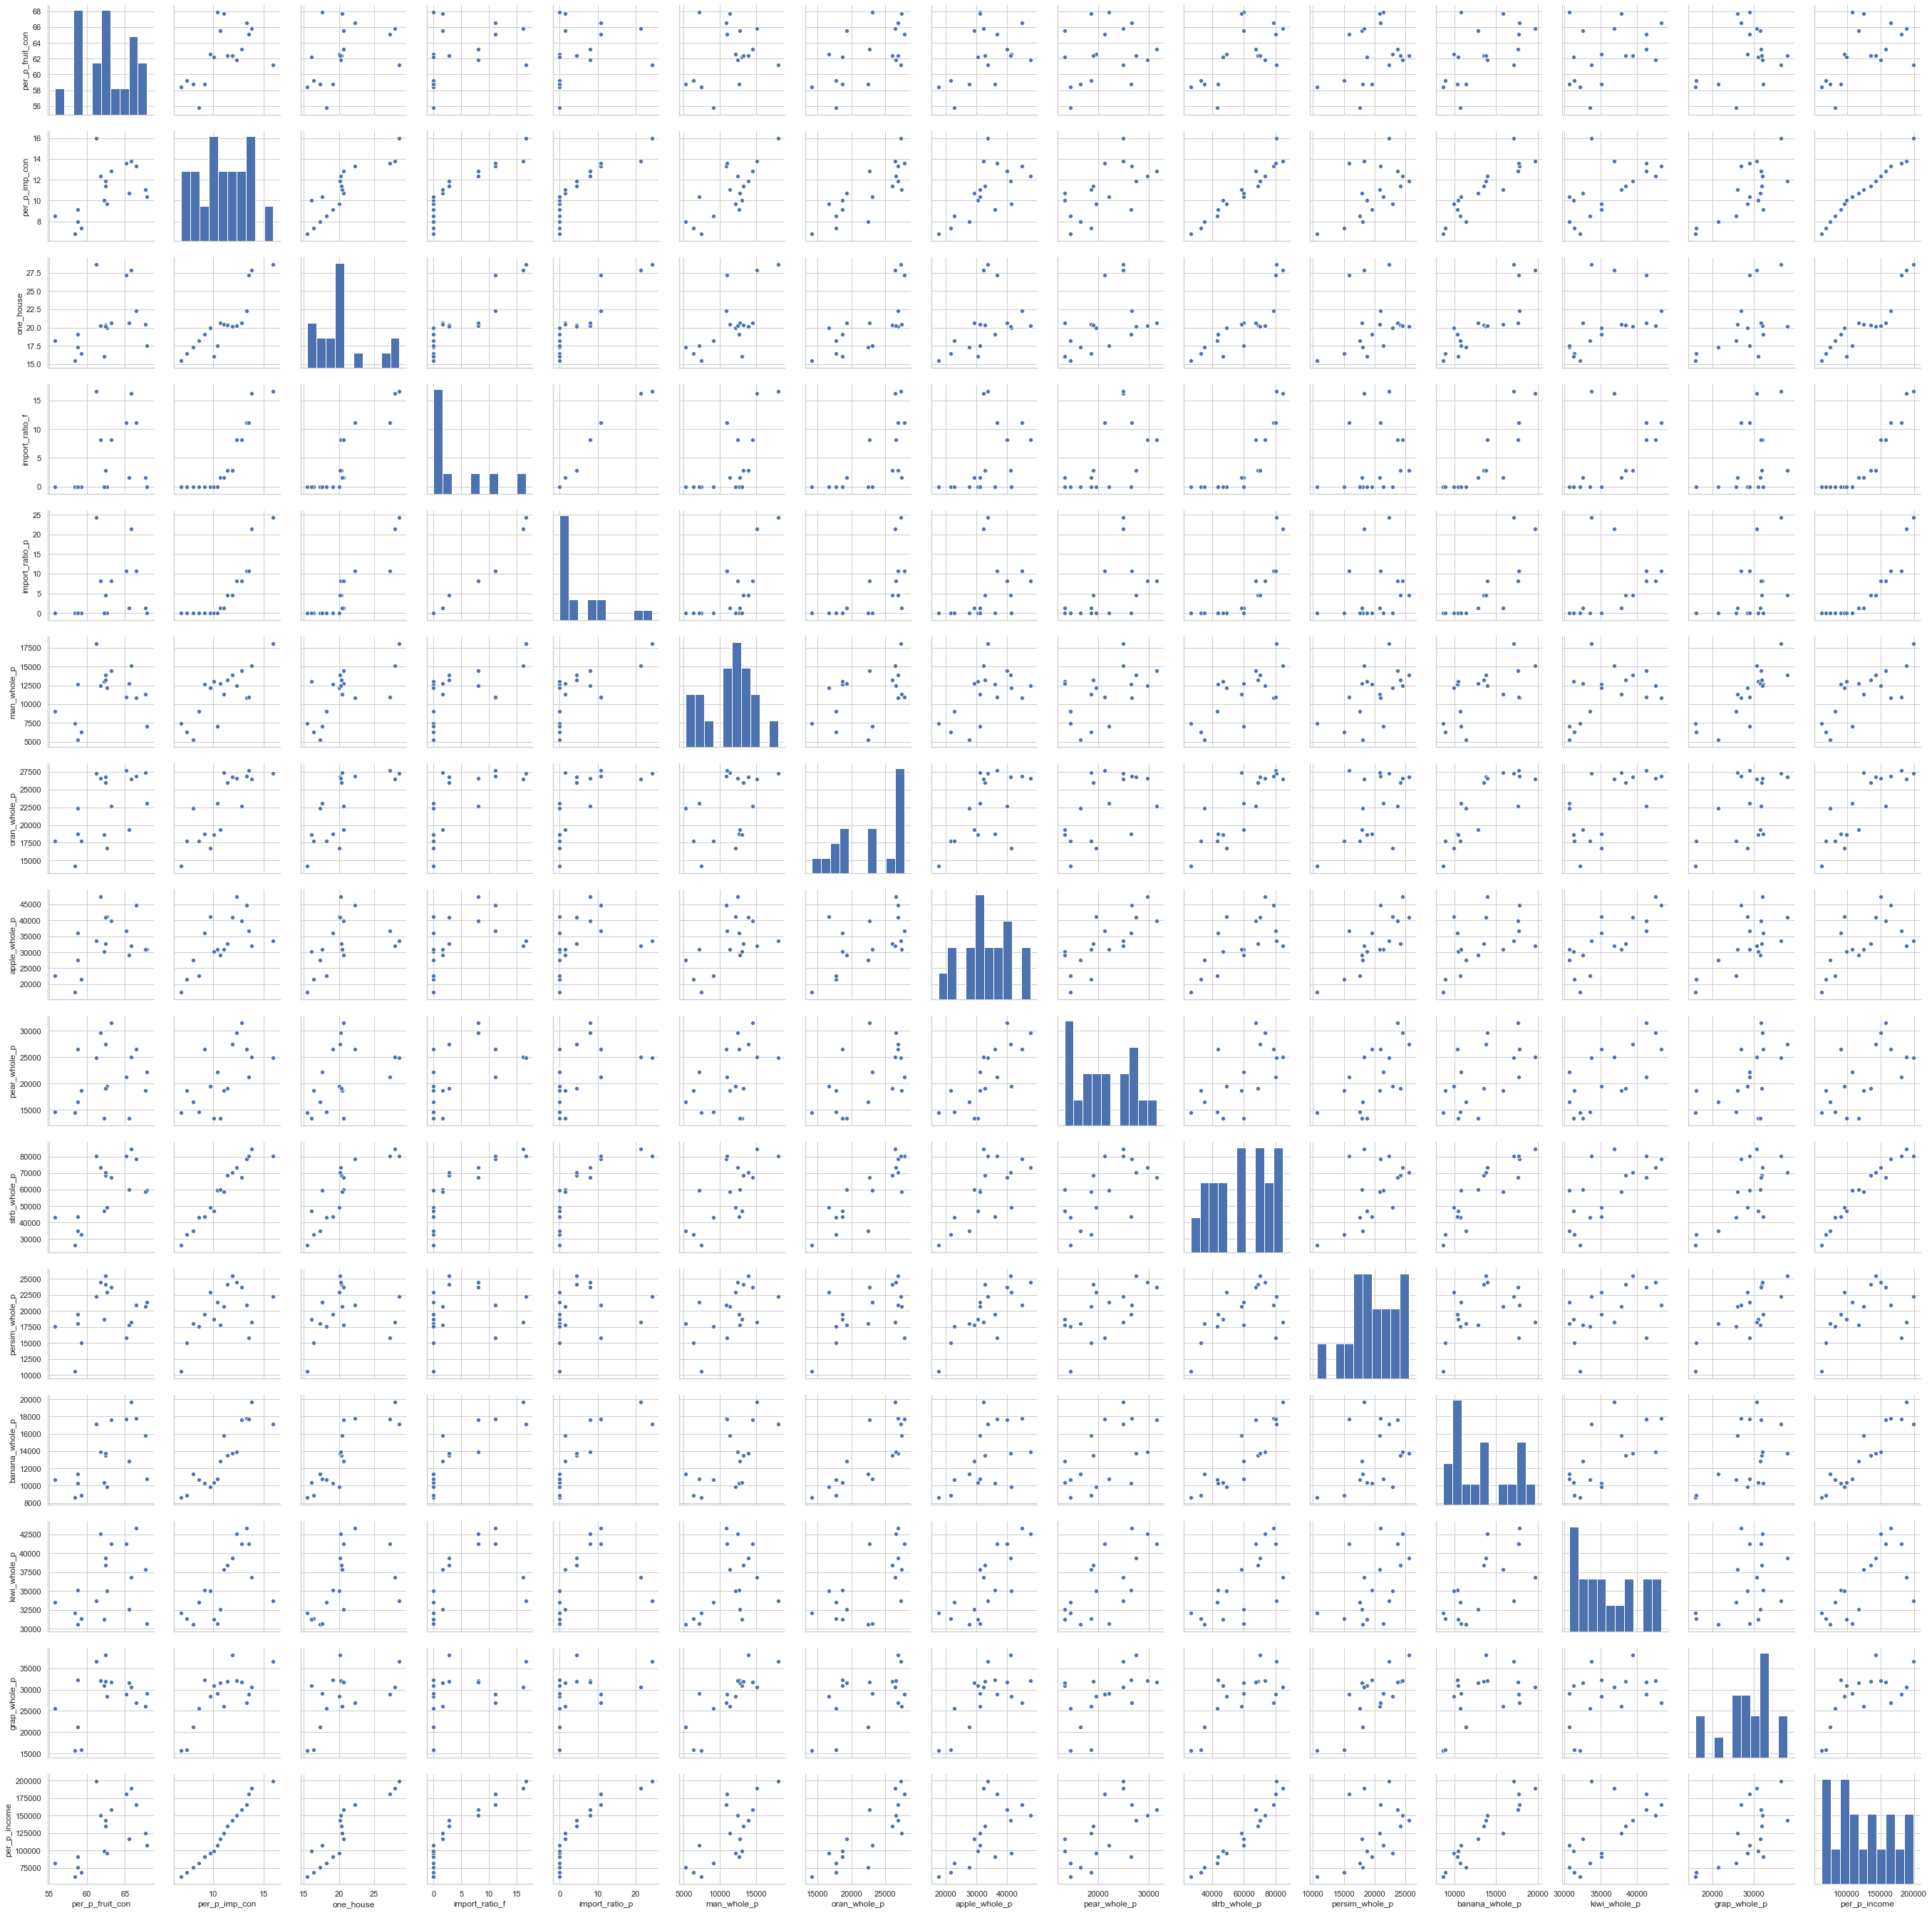

C:\Users\ICT01_10\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\ICT01_10\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_10\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\ICT01_10\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_10\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcpara

In [8]:
y = mandarine_consume_df2.iloc[:,0]
X = mandarine_consume_df2.iloc[:,1:]

# version 1
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

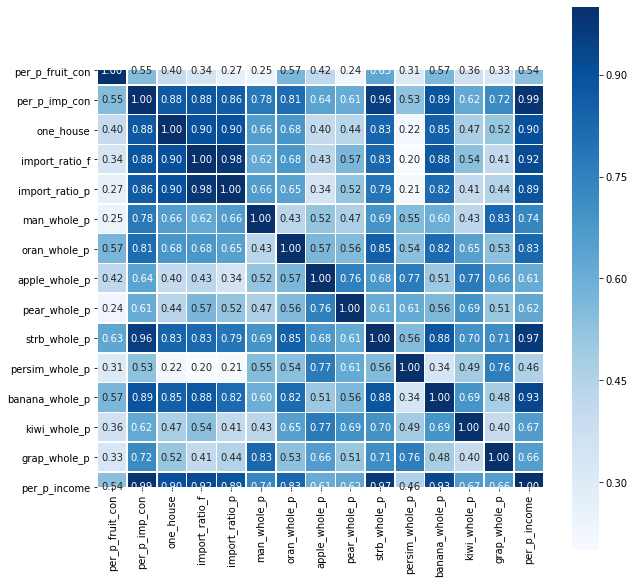

In [5]:
# version 2
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True, square=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [ ]:
선형 회귀(Linear regression)는 
종속 변수(또는 응답 변수) y와 
한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관관계를 모델링하는 회귀분석 기법이다. 
한 개의 독립 변수에 기반한 경우에는 단순 선형 회귀, 
둘 이상의 독립 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

선형 회귀 그래프로는 산점도(Scatter plots)를 많이 활용합니다. 
그리고 독립 변수와 종속 변수 간의 상관관계를 나타내는 척도를 상관 계수(correlation coefficient)라고 합니다.
상관 계수는 보통 r로 표기합니다. 
여러 상관 계수가 있지만 선형 회귀의 상관 계수로 가장 많이 쓰이는 것은 
피어슨 상관 계수(Pearson correlation coefficient)입니다.

최소자승법 (Least-squares Method)
산점도로 데이터의 분포 그래프를 그렸을 때, 
이 데이터들의 경향을 알고 싶다면 추세선을 그릴 것입니다. 
어떤 데이터가 주어졌을 때 최적의 추세선을 그리기 위한 방법 중 하나가 
최소자승법 (Least-squares Method)입니다. 
예시를 들어보겠습니다. 아래 그래프처럼 총 7개의 데이터가 있습니다. 
이 7개 데이터의 추세선을 그리고 싶을 때 쓰는 방법이 최소자승법입니다

7개 데이터의 경향을 나타내는 추세선을 아래와 같이 그렸습니다. 
이때 실제 데이터의 y값(실제값)과 추세선의 y값(예측값)의 차를 잔차(Residual)라고 합니다.
아래 그래프에서 잔차는 점선으로 표시했습니다. 
최소자승법은 이 잔차의 제곱의 합을 최소로 하는 방법입니다.

In [ ]:
VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봅니다. 
독립 변수 a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높습니다. 
어느 하나만 VIF가 높은 경우는 없습니다. 
박수도 오른손과 왼손이 있어야 칠 수 있듯이 서로 연관 있는 변수끼리 VIF가 높습니다. 

https://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF
    
    bedrooms의 coef가 -2925.8063입니다. 
    즉, 침실 개수(bedrooms)와 집 값(price)이 음의 상관 관계를 갖는다는 뜻입니다. 
    bedrooms가 많아질수록 price가 떨어진다는 말입니다. 
    이전 챕터에서 했던 것 처럼 bedrooms와 price끼리만
    OLS 회귀를 해보면 양의 상관 관계를 보입니다. 
    실제는 양의 상관 관계를 보이는데 
    여기서는 음의 상관 관계를 보이는 것으로 결과가 잘못 나왔습니다. 
    이는 위에서 설명한 것처럼 다중공선성으로 인해 회귀 결과가 잘못나온 것입니다.
   
VIF 했을때 bedrooms와 bathrooms가 10 이상이므로 서로 강한 상관 관계를 보입니다.
    bedrooms와 bathrooms 중 하나를 drop 하고 회귀를 하면 다중공선성 문제가 해결됩니다.
    
    bathrooms 변수를 drop 하고 다시 OLS 회귀를 했습니다. 
    bedrooms의 coef가 1626.8306으로 양수가 되었습니다. 
    아까는 음수였는데 이제는 양수가 되었습니다.
    
    추가적으로, R-squared값은 bedrooms를 drop하지 않은 모델과 drop한 모델 모두 0.678입니다. 
    바로 앞 챕터에서 R-squared의 의미를 알아봤습니다. 
    결정 계수를 뜻하는 단어로 회귀모형 유용성의 척도입니다. 
    R-squared가 drop 전과 후가 동일하게 0.678이라는 말은
    bedrooms와 bathrooms 둘 모두가 필요하지 않다는 뜻입니다. 
    둘 중 하나만 있어도 된다는 겁니다. 
    bedrooms를 drop했음에도 모델의 예측력에 영향을 끼치지 않았습니다.

In [9]:
# 2. VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif
# 1인당 가처분소득이 눈에 띄게 높음, 빼야 하나...

,VIF Factor,features
0,959.310004,per_p_fruit_con
1,4014.749646,per_p_imp_con
2,355.568480,one_house
3,1087.960682,import_ratio_f
4,672.546551,import_ratio_p
5,287.143147,man_whole_p
6,431.040092,oran_whole_p
7,355.716682,apple_whole_p
8,104.236253,pear_whole_p
9,887.654598,strb_whole_p


In [17]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
standard_X = StandardScaler().fit(X)

In [16]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

seed = 3
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=seed)
result1 = sm.OLS(y_train, X_train).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          per_p_man_con   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                nan
Time:                        10:51:44   Log-Likelihood:                 374.56
No. Observations:                  13   AIC:                            -723.1
Df Residuals:                       0   BIC:                            -715.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            46.5011        inf          0        n

In [21]:
# 변수 몇 개 삭제하고 다시 해보자..?
X2 = mandarine_consume_df2.iloc[:,1:].drop(columns=['per_p_income','per_p_imp_con','import_ratio_f','per_p_fruit_con'])
X2

scale_X2 = scale(X2)
robust_X2 = robust_scale(X2)
minmax_X2 = minmax_scale(X2)
standard_X2 = StandardScaler().fit(X2)

In [22]:
seed = 3
X2_train, X2_test, y_train, y_test = train_test_split(minmax_X2, y, random_state=seed)
result2 = sm.OLS(y_train, X2_train).fit()
print(result2.summary())
# 이렇게해서는 답이 없는 듯! RFE를 해야겠다

                                 OLS Regression Results                                
Dep. Variable:          per_p_man_con   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              5.604
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                       0.161
Time:                        10:55:00   Log-Likelihood:                         -29.464
No. Observations:                  13   AIC:                                      80.93
Df Residuals:                       2   BIC:                                      87.14
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [26]:
# 3. feature selection (RFE)
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel='linear')
selector = RFE(estimator, step=1)
selector = selector.fit(X, y)

X.columns[selector.support_]
X_RFE = X[X.columns[selector.support_]]
# RFE로 변수 선택함!

In [27]:
X.columns[selector.support_]

Index(['per_p_fruit_con', 'per_p_imp_con', 'one_house', 'import_ratio_f',
       'import_ratio_p', 'man_whole_p', 'oran_whole_p'],
      dtype='object')

In [78]:
# train, test set 나누기 (cross validation)
#from sklearn.model_selection import train_test_split

# 모델1. OLS
# 모델2. linear regression
# 모델3. linear regression with regulation (gridSearch CV)
# 모델4. SVR
# 모델5. decision tree
# 모델6. random forest
# 모델7. XGboost

X3 = mandarine_consume_df2[['man_whole_p','oran_whole_p','one_house']]

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_pca = Pipeline([('scl', StandardScaler()),
                       ('pca', PCA()),
                       ('fit', Ridge(random_state=42))])
pipe_pls = Pipeline([('scl', StandardScaler()),
                       ('fit', PLS())])
pipe_gbr = Pipeline([('scl', StandardScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', StandardScaler()),
                       ('fit',RFR())])
pipe_svr = Pipeline([('scl', StandardScaler()),
                       ('fit',SVR())])
pipe_KR = Pipeline([('scl', StandardScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_pca = [{"pca__n_components" : np.arange(2,6)}]

grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]

grid_params_pls = [{"fit__n_components": np.arange(2,8)}]

min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_svr = [{"fit__kernel":["rbf","linear"],
                    "fit__degree":[2,3]}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls,
       pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
params = [grid_params_linear, grid_params_lasso, grid_params_pca,
         grid_params_ridge, grid_params_pls, grid_params_gbr,
         grid_params_rfr, grid_params_svr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

In [80]:
for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    5.1s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    6.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    2.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

In [100]:
model_mse

{'Linear': 0.5933446706631745,
 'Lasso': 0.5197240648153566,
 'Ridge': 0.43639152813698256,
 'GradientDescentRegressor': 1.8240940211465286,
 'RandomForestRegressor': 0.40430816326530605,
 'Kernel RidgeRegression': 0.20791404861181706}

<function matplotlib.pyplot.show(*args, **kw)>

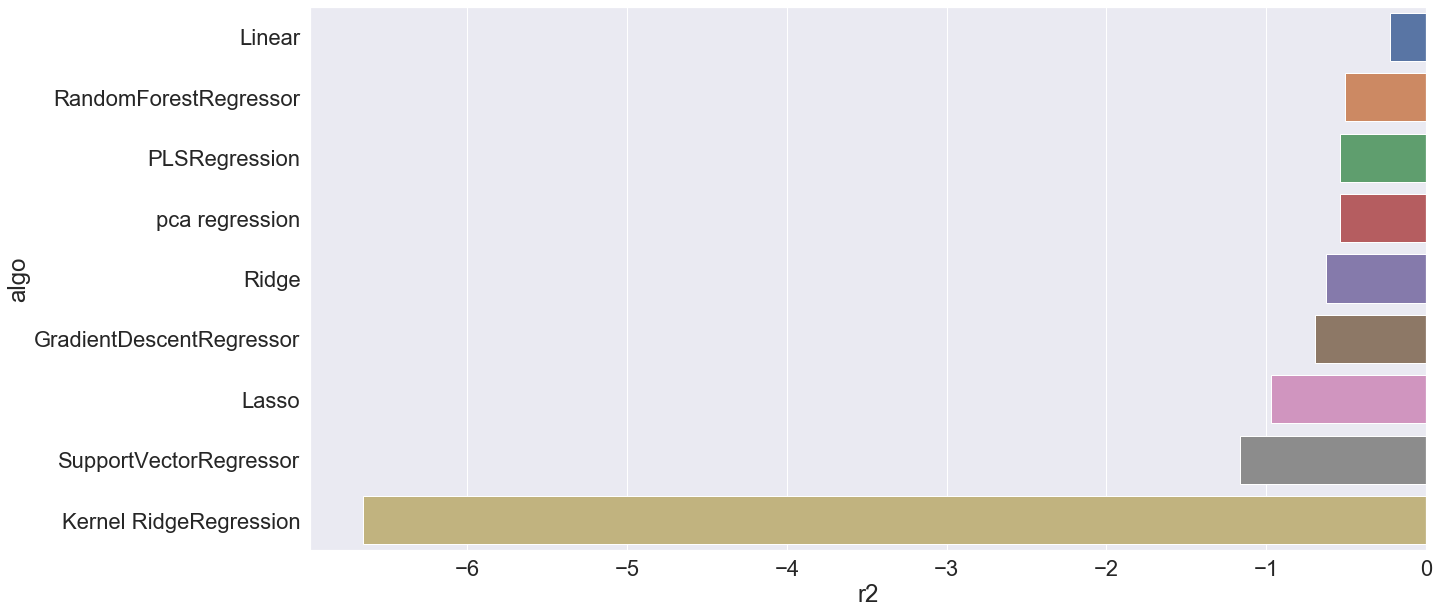

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show

# 개망함.......

In [98]:
X3 = mandarine_consume_df2[['man_whole_p']]

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_gbr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',RFR())])
pipe_KR = Pipeline([('scl', MinMaxScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]


min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_ridge, 
       pipe_gbr, pipe_rfr, pipe_KR]
params = [grid_params_linear, grid_params_lasso,
         grid_params_ridge, grid_params_gbr,
         grid_params_rfr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge' ,
    3: "GradientDescentRegressor" ,
    4: "RandomForestRegressor" ,
    5: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    6.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 782 tasks      | elapsed:    1.8s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    2.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1288 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done 3448 tasks      | elapsed:    5.7s
[Parallel(n_jobs=20)]: Done 4500 out of 4500 | elapsed:    7.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)

finish


[Parallel(n_jobs=20)]: Done 120 out of 120 | elapsed:    0.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    0.0s finished


<function matplotlib.pyplot.show(*args, **kw)>

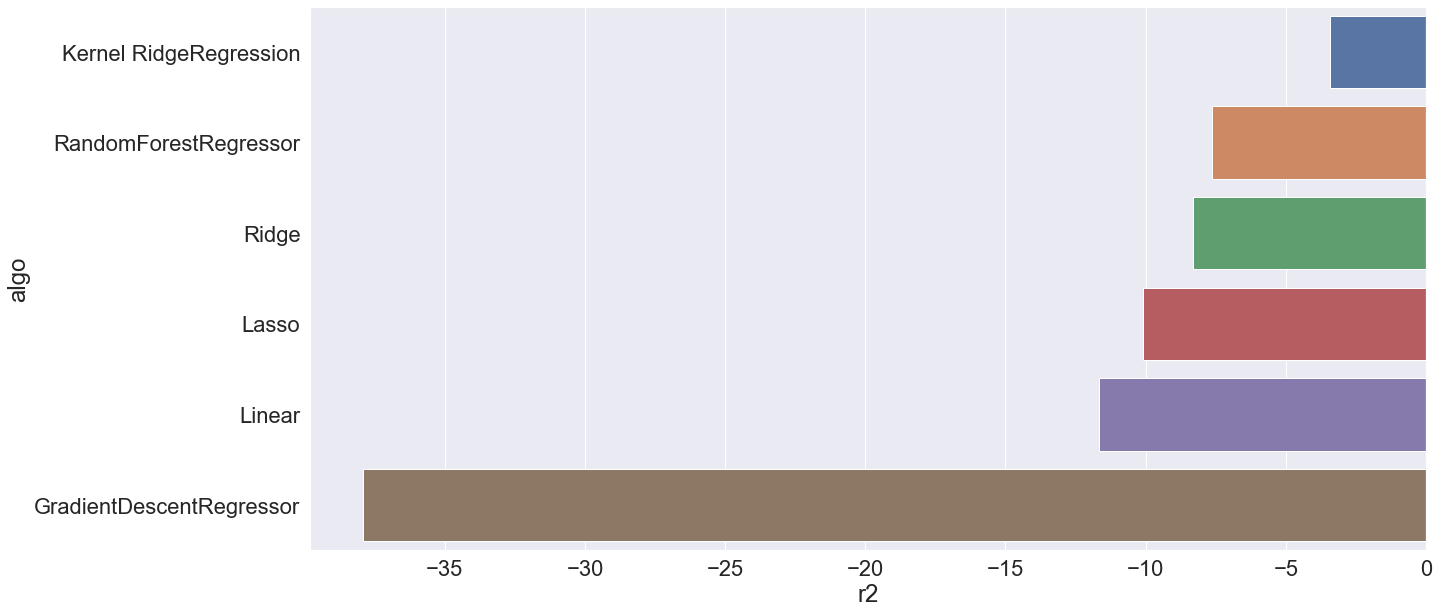

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show

# 개망함.......

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=0)
er = VotingRegressor([('lr',r1),('rf',r2)])
print(er.fit(X,y).predict(X))

[12.2130395  12.7124487  13.48996609 12.82497747 12.26171916 13.12054295
 12.68073922 15.84267741 13.03714266 15.06676226 12.8292102  13.11362087
 13.45165991 13.28855165 14.28944604 12.62325714 12.11314379 11.72609499]


In [96]:
er.score(X,y)

0.9611376657121187